In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from matplotlib import pyplot as plt

In [ ]:
iris = load_iris()

In [ ]:
x = pd.DataFrame(iris.data)     # podaci
y = pd.Series(iris.target)   # klasa    series - jednodimenizoni nizovi

In [ ]:
# (150, )
# 150 - redova

y.shape

(150,)

In [ ]:
# (150, 4)
# 150 - redova
# 4 kolone

x.shape

(150, 4)

In [ ]:
# informacije u x
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: >

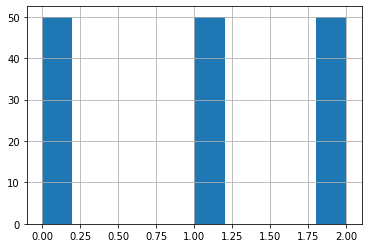

In [ ]:
y.hist()

In [ ]:
y.unique()

array([0, 1, 2])

In [ ]:
# nedostajuce vrednosti
x.isna().any()

0    False
1    False
2    False
3    False
dtype: bool

In [ ]:
# Normalizacija nije bitna kod drveta odlucivanja, jer posmatramo odvojeno atribute
# Normalizaciju ne moramo
x.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# za projekte : ako ima neku slucajnost staet treba da se postavi da bi dobijali iste rezultate
# u svakom modelu da imamo stratifikovanu podelu
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=12, stratify=y)

In [ ]:
model = DecisionTreeClassifier(max_depth=2, class_weight={0:1, 1:50, 2:1})
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 50, 2: 1}, max_depth=2)

In [ ]:
# klase koje je model predvideo
y_pred_train = model.predict(x_train)

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[16,  0,  0],
       [ 0, 15,  2],
       [ 0,  2, 15]])

In [ ]:
accuracy_score(y_train, y_pred_train)

1.0

In [ ]:
y_pred_test = model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.88

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[16,  0,  0],
       [ 0, 13,  4],
       [ 0,  2, 15]])

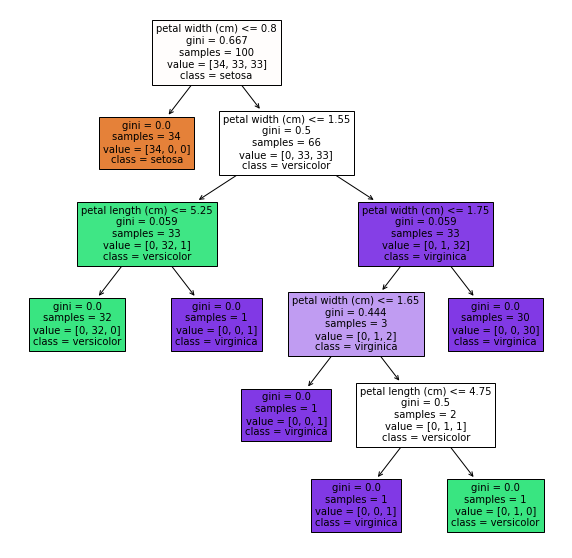

In [ ]:
plt.figure(figsize=(10, 10))
_ = plot_tree(model, feature_names=feature_names, class_names=target_names, filled=True)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      0.76      0.81        17
           2       0.79      0.88      0.83        17

    accuracy                           0.88        50
   macro avg       0.89      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



In [ ]:
# domaci da model dovedemo do tacnosti do reko 92%

In [ ]:
# ovabezno ovg tipa odraditi za projekat jer daju dovoljno dobre rezultate
from sklearn.esanble import RandomForestClasifer

ModuleNotFoundError: ignored